In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../Data/www/styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# Regression Analysis

So far we've covered how you can perform basic data analysis on structured data using Pandas. However, Pandas does not have one of the most common forms of analysis for this type of data built into it --- regression analysis.

Many of you have created a linear regression before, although not all of you may know that you did it. The basic idea is pretty simple, we want to determine the linear relationship between some variable $x$ and another variable $y$. 

Sounds familiar right? All I'm describing is the equation $y = mx + b$ that we learned back in high school. This linear model describes the relationship between some independent $x$ variable and its dependent $y$.

Fitting a regression model is common in many disciplines, so I'm going to show you how to do that in Python now. I want to explain enough of the mathematical background such that everyone can follow along, but this isn't meant as a proper explanation of the underlying statistics or when you should use a regression model. If you're not familiar with this model or the underlying statistics and want to learn more I recommend this [statistics textbook](http://www.amazon.com/Statistics-4th-Edition-David-Freedman/dp/0393929728).

# But...math!

I know, so let's start with a simple, concrete example. Let's say that someone's High-School Senior GPA is almost exactly the same as their first year College GPA. This means that if we wanted to predict a student's first year gpa ($y$) we would guess based on their High school GPA ($x$). More simply, $y = x$.

I'll create that data now with Numpy where I apply some small amount of noise.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#We turn off the latex usage in matplotlib because LaTeX doesn't know
#how to handle a '_' character without it being escaped with a backslash
#Since we use '_' in column names typically this can be a bit of a problem
#If we don't turn this off
mpl.rc('text', usetex=False)

In [2]:
#I will create 100 gpas, with a random probability
high_school_gpas = np.random.uniform(0, 4, 100)
#The college gpas are created by adding some noise
college_gpas = high_school_gpas + np.random.normal(0, 0.2, 100)

Now let's plot the relationship just so it's clear.

/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


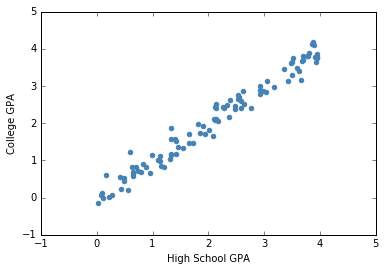

In [3]:
plt.scatter(high_school_gpas, college_gpas, color='steelblue')
plt.ylabel('College GPA')
plt.xlabel('High School GPA')

Now let's say that we didn't create this data and we wanted to identify the relationship between High School and College GPA. We can do that by fitting a linear model to the data.

With Python we can fit a Linear Model using the `statsmodels` library. Fitting a linear model involves using [Ordinary Least Squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) to identify the parameters. In this lecture I won't go over how this works, but you should look into it later if you plan on fitting linear models.

In [4]:
import statsmodels.api as sm

First what I do is add a constant to the independent dataset. Without this we are just modelling $y=mx$, instead of $y=mx+b$. Our example doesn't need this constant, but I want to show you how to do it.

In [5]:
X = sm.add_constant(high_school_gpas)

Now we create the ordinary least squares regression, this is our `model`

In [6]:
simdata_model = sm.OLS(college_gpas, X)

Once we fit the model, this becomes our result

In [7]:
simdata_result = simdata_model.fit()

The fitted result has a number of features, but the one that we care about most is the `summary()`. This tells us about our fitted model.

In [8]:
simdata_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     3234.
Date:                Tue, 09 Aug 2016   Prob (F-statistic):           7.38e-77
Time:                        13:46:46   Log-Likelihood:                 15.733
No. Observations:                 100   AIC:                            -27.47
Df Residuals:                      98   BIC:                            -22.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0150      0.042     -0.358      0.721        -0.098     0.068
x1             0.9982      0.018     56.870      0.000         0.963     1.033
==============================================================================
Omnibus:                        3.608   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                3.004
Skew:                           0.404   Prob(JB):                        0.223
Kurtosis:                       3.264   Cond. No.                         5.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Does anyone know what all of these features mean?

**That's insane if you do right now!**

Now we can plot the best-fit line along with the data.

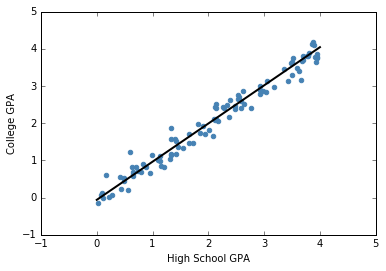

In [9]:
#Here is the data again
plt.scatter(high_school_gpas, college_gpas, color='steelblue')
#Now for our equation
sim_x = np.linspace(0, 4, 100)
sim_y = 1.0262 * sim_x - 0.0608
plt.plot(sim_x, sim_y, color='black', linewidth=2)
#Our labelled axes
plt.ylabel('College GPA')
plt.xlabel('High School GPA')

Pretty darn good!

But this isn't actually real data. I've downloaded some real data that was a part of an introductory statistics textbook. Let's load that csv with Pandas right now.

In [10]:
import pandas as pd

df = pd.read_csv('../Data/student_gpa_data.csv')

df.head()

,GPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound
0,3.06,3.83,680,770,1,3.0,9.0,1,1,1
1,4.15,4.00,740,720,0,9.0,3.0,0,1,1
2,3.41,3.70,640,570,0,16.0,13.0,0,0,1
3,3.21,3.51,740,700,0,22.0,0.0,0,1,1
4,3.48,3.83,610,610,0,30.5,1.5,0,1,1


In this dataframe we have 10 columns:

    GPA - 1st Year College GPA
    HSGPA - High School GPA
    SATV - SAT Verbal Score
    SATM - SAT Math Score
    Male - Male (1) or Female (0)
    HU - Number of credit hours earned in humanities courses in high school.
    SS - Number of credit hours earned in social science courses in high school.
    FirstGen - First Generation College Student
    White - White (1) or Other Ethnicity (0) 
    CollegeBound - 1 = attended a high school where >=50% students intended to go on to college, 0 = otherwise
    
But right now, let's just look at the relationship between High School GPA and College GPA like we did previously.

Like always we should take a look at the raw data before we try to model it.

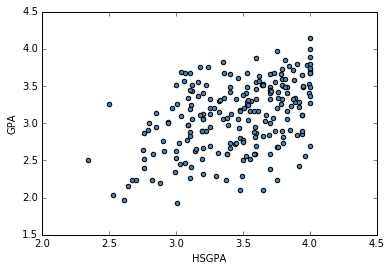

In [11]:
df.plot(kind='scatter', x = 'HSGPA', y = 'GPA', color='steelblue')

Yikes! Looks like my initially generated data was a bit optimistic....

Let's try fitting a linear model to this dataset and see what it looks like.

Now here's a cool thing, there are actually two ways to run regressions with statsmodels. The first one is by importing the vanilla `statsmodels` from `statsmodels.api`. The other way is by calling `statsmodels` formulas, which are from `statmodels.formula.api`. Why is there this crazy naming scheme? ...I can't really tell you actually.

In [12]:
import statsmodels.formula.api as smf

The great thing about the formula is that it works directly with a Dataframe! We just have to learn a little bit of syntax. I'll show you how it works first.

In [13]:
realdata_model = smf.ols(formula = 'GPA ~ HSGPA', data = df)

We can type out a linear formula and it will automatically add the constant that we previously had to add manually. When we write a formula it is set up as:

    dependent variable = independent variable
    
but the equals sign is replaced by a `~`. All we need to do is tell it the name of the columns in the dataframe that we want it to use in the model.

We also tell the model that the data is coming from the dataframe.

Now we can fit the model just like before.

In [14]:
realdata_result = realdata_model.fit()
realdata_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     54.15
Date:                Tue, 09 Aug 2016   Prob (F-statistic):           3.78e-12
Time:                        13:46:53   Log-Likelihood:                -118.38
No. Observations:                 219   AIC:                             240.8
Df Residuals:                     217   BIC:                             247.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1799      0.262      4.504      0.000         0.664     1.696
HSGPA          0.5550      0.075      7.359      0.000         0.406     0.704
==============================================================================
Omnibus:                        5.915   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                4.952
Skew:                          -0.279   Prob(JB):                       0.0841
Kurtosis:                       2.518   Cond. No.                         34.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### So what does this all mean?

First, we might notice the difference in the slope between the simulated data model line and the real data model line. We can show that here

/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


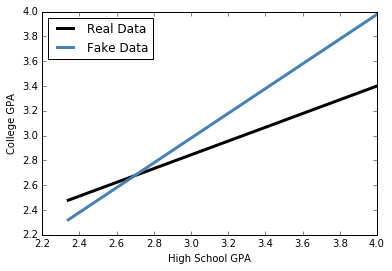

In [15]:
#answer
#Here I define our x and y variables for the real data
real_x = np.linspace(df.HSGPA.min(), 4, 100)
real_y = realdata_result.params['HSGPA'] * real_x + realdata_result.params['Intercept']
#Here I redefine our simulated y to use the same x-range as our real data
sim_y = simdata_result.params[1] * real_x + simdata_result.params[0]
#Now I plot the lines
plt.plot(real_x, real_y, color='black', label='Real Data', linewidth=3)
plt.plot(real_x, sim_y, color='steelblue', label='Fake Data', linewidth=3)
plt.legend(loc='best')
plt.ylabel('College GPA')
plt.xlabel('High School GPA')

Remember that the slope of a line is defined as the rise over the run (or $\frac{\Delta y}{\Delta x}$)?

This plot shows that in the fake data for every point increase in High School GPA there was an **equal** point increase in College GPA.

In the real data, the slope of the line is not as steep - meaning that the College GPA *rises* less than the High School GPA *runs*. So if a student had a High School GPA of 4.0, we would predict a College GPA of 3.4. 

In [16]:
realdata_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     54.15
Date:                Tue, 09 Aug 2016   Prob (F-statistic):           3.78e-12
Time:                        13:46:54   Log-Likelihood:                -118.38
No. Observations:                 219   AIC:                             240.8
Df Residuals:                     217   BIC:                             247.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1799      0.262      4.504      0.000         0.664     1.696
HSGPA          0.5550      0.075      7.359      0.000         0.406     0.704
==============================================================================
Omnibus:                        5.915   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                4.952
Skew:                          -0.279   Prob(JB):                       0.0841
Kurtosis:                       2.518   Cond. No.                         34.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Next we should notice that this model doesn't explain nearly as much of the real data as the synthetic data. We can tell this by the R-squared value. 

With real data, high school GPA only predicts 20% of the variance in college GPA.

This becomes a bit more intuitive when we plot the regression line against the data.

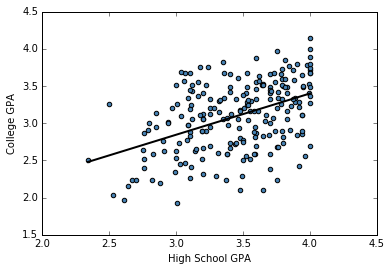

In [17]:
#Here is the data again
ax = df.plot(kind='scatter', x = 'HSGPA', y = 'GPA', color='steelblue')
#Now for our equation
plt.plot(real_x, real_y, color='black', linewidth=2)
#Our labelled axes
plt.ylabel('College GPA')
plt.xlabel('High School GPA')

We can tell by looking at the data, that there is much more 'spread' or *variability* in the vertical axis than the line accounts for. This makes sense given the definition of the [$R^2$ coefficient](https://en.wikipedia.org/wiki/Coefficient_of_determination). This measure compares the distance from each point to the fitted line against the total variability in the dependent data. We would have $R^2=1.0$ if all of the datapoints sat directly on the predicted line.

This means that in the real world, High School GPA is not solely predictive of a student's College GPA.

I wonder why?

Maybe it's because some students may be bored with regular instruction in High School and don't pay attention or turn in assignments. Maybe if we used both the High School GPA and the SAT scores we would be able to predict the College GPA better.

In [18]:
test_scores_model = smf.ols(formula='GPA ~ HSGPA + SATV + SATM', data=df)
test_scores_result = test_scores_model.fit()
test_scores_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     23.43
Date:                Tue, 09 Aug 2016   Prob (F-statistic):           3.67e-13
Time:                        13:47:06   Log-Likelihood:                -111.80
No. Observations:                 219   AIC:                             231.6
Df Residuals:                     215   BIC:                             245.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.5878      0.327      1.798      0.074        -0.057     1.232
HSGPA          0.4962      0.075      6.589      0.000         0.348     0.645
SATV           0.0012      0.000      2.946      0.004         0.000     0.002
SATM           0.0001      0.000      0.341      0.733        -0.001     0.001
==============================================================================
Omnibus:                        4.495   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                3.477
Skew:                          -0.188   Prob(JB):                        0.176
Kurtosis:                       2.511   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interesting! Judging by the $R^2$, there was a minor increase in how well this new model fits the data. However, the results weren't quite what we expected!

There is a *small* but *significant* positive relationship between the SAT Verbal score and a student's First Year College GPA. However, there is *no significant* relationship with the SAT Math score.

Guess being good at math only goes so far, huh?

Well, if our SAT test scores only have a very minor effect on our College GPA I wonder what being a first generation college student will do. It's possible that people who are the first in their family to go to college work harder than those of us who had parents go.

In [19]:
firstgen_model = smf.ols(formula='GPA ~ HSGPA + SATV + FirstGen', data=df)
firstgen_result = firstgen_model.fit()
firstgen_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     25.60
Date:                Tue, 09 Aug 2016   Prob (F-statistic):           3.35e-14
Time:                        13:47:16   Log-Likelihood:                -109.33
No. Observations:                 219   AIC:                             226.7
Df Residuals:                     215   BIC:                             240.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7160      0.295      2.427      0.016         0.135     1.297
HSGPA          0.5185      0.075      6.918      0.000         0.371     0.666
SATV           0.0010      0.000      2.911      0.004         0.000     0.002
FirstGen      -0.1998      0.089     -2.241      0.026        -0.376    -0.024
==============================================================================
Omnibus:                        6.028   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                4.446
Skew:                          -0.224   Prob(JB):                        0.108
Kurtosis:                       2.464   Cond. No.                     6.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Guess I was wrong! Being a first generation college student has a *significant, negative* relationship with College GPA.

Now let's plot this model. 

But wait, how do we plot it now that the x-axis has three components and isn't just the High School GPA?

What we do is calculate the x position for each data point we have and then plot that x-value against the College GPA.

Let's write that function now.

In [ ]:
#YOur code here



In [21]:
#answer
def calculate_firstgen_x_value(row, params = firstgen_result.params):
    '''
    input:
        row - one row of student data from the pandas dataframe
        params - the model parameters dictionary
    output:
        modelx - the calculated x point for the model
    '''
    columns = ['HSGPA', 'SATV', 'FirstGen']
    modelx = params['Intercept']
    for col in columns:
        modelx += params[col] * row[col]
    return modelx

And now we will `apply` it to the dataframe. I haven't covered how to do this yet, but I will now!

In Pandas we can `apply` our own functions to a dataframe. We can apply them to a single column (in which case the input value to the function is a single variable) or to the entire dataframe (in which case the input value to the function is a `Series` and is either a row or column in the dataframe).

Here I need to access multiple columns of data for each student so I will `apply` the `calculate_firstgen_x_value()` function to the entire dataframe. I also want to calculate each student's value so I need to apply this to the rows. To pick `rows` instead of columns we need to change the `axis` argument to `1`.

Since I want to keep this value I'll set the output equal to a new column name.

In [22]:
df['firstgen_model'] = df.apply(calculate_firstgen_x_value, axis = 1)

df.head()

,GPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound,firstgen_model
0,3.06,3.83,680,770,1,3.0,9.0,1,1,1,3.190629
1,4.15,4.00,740,720,0,9.0,3.0,0,1,1,3.539365
2,3.41,3.70,640,570,0,16.0,13.0,0,0,1,3.282558
3,3.21,3.51,740,700,0,22.0,0.0,0,1,1,3.285281
4,3.48,3.83,610,610,0,30.5,1.5,0,1,1,3.319594


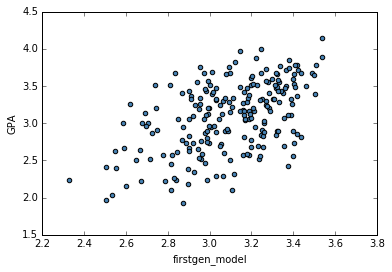

In [23]:
df.plot(kind='scatter', x='firstgen_model', y='GPA', color='steelblue')

We can see that when we transform the x data values the spread in the y-axis is much smaller than when we first modeled the relationship between College GPA and the High School GPA.

Of course, we could also use the built-in plotting from `statsmodels` too. It will only show a single independent variable at a time, but it's a really quick way to plot!

The first plot we can use is with `plot_fit()`. The `plot_fit()` funciton shows the real data points and the predicted data point (with confidence intervals).

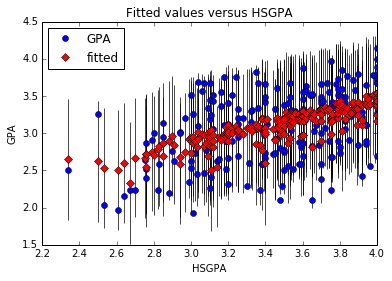

In [24]:
sm.graphics.plot_fit(firstgen_result, 'HSGPA');

The other plotting function is more of a diagnostic one for users to evaluate how good their model is. It's the `plot_regress_exog` function.

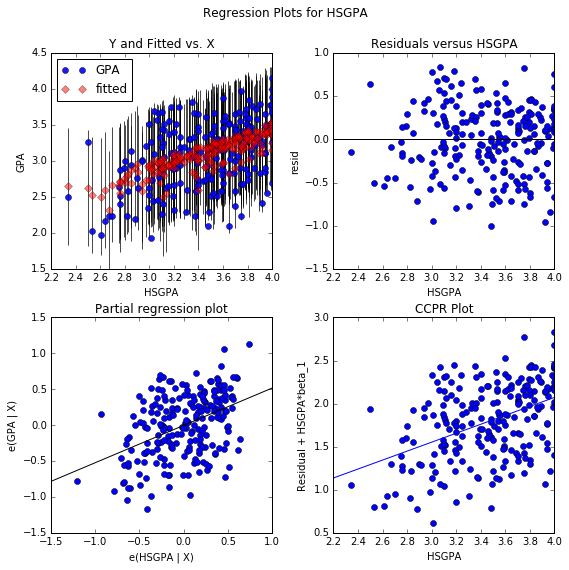

In [25]:
fig = plt.figure(figsize = (8,8))
sm.graphics.plot_regress_exog(firstgen_result, 'HSGPA', fig=fig);

# Regression methods in Python

Statsmodels has more built into than basic linear regression though. It also has:

    * Generalized Linear Models (Regression with a defined distribution link - logit and probit are in this category)
    * Generalized Estimating Equations (GLM with correlation)
    * Linear Mixed Effects models)
    * Hazard Regression
    * Kernel Regression
    * Generalized Method of Moments
    * Time Series analysis (ARMA, ARIMA, VARMA, VAR)
    
However, if you're looking for some of the newer machine-learning based regression techniques such as:

    * LASSO (Least Absolute Shrinkage and Selection Operator)
    * Ridge Regression
    * Random Forest Regression
    * Support Vector Regression
    
Then you'll need to use `scikit-learn` instead. Scikit Learn also duplicates some of the functions that are contained within `statsmodels` (linear regression, logistic regression, ...., [full list here](http://scikit-learn.org/stable/modules/linear_model.html). One downside of using scikit-learn is that it isn't integrated with Pandas as well as statsmodels (for now, that will likely change in the future).

As an example, we'll show a LASSO regression with scikit-learn.

In [26]:
df

,GPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound,firstgen_model
0,3.06,3.83,680,770,1,3.0,9.0,1,1,1,3.190629
1,4.15,4.00,740,720,0,9.0,3.0,0,1,1,3.539365
2,3.41,3.70,640,570,0,16.0,13.0,0,0,1,3.282558
3,3.21,3.51,740,700,0,22.0,0.0,0,1,1,3.285281
4,3.48,3.83,610,610,0,30.5,1.5,0,1,1,3.319594
5,2.95,3.25,600,570,0,18.0,3.0,0,1,1,3.008717
6,3.60,3.79,710,630,0,5.0,19.0,0,1,1,3.400098
7,2.87,3.60,390,570,0,10.0,0.0,0,0,0,2.977590
8,3.67,3.36,630,560,0,8.5,15.5,0,1,1,3.096130
9,3.49,3.70,680,670,0,16.0,12.0,0,1,1,3.323056


In [42]:
from sklearn import linear_model

#First we instantiate the mdoel
clf = linear_model.Lasso(alpha = 0.1)

#Create the X and Y variable sets - must be numpy arrays!
y = df.GPA.values
x = df.loc[:, 'HSGPA':'CollegeBound'].values
#Fit the model
clf.fit(x, y)
#Get the parameters
for param_name, param_value in zip(df.columns[1:-1], clf.coef_):
    print(param_name, param_value)

HSGPA 0.0
SATV 0.0013212750795
SATM 0.000457239487706
Male -0.0
HU 0.0178994367085
SS 0.00476693920248
FirstGen -0.0
White 0.0
CollegeBound -0.0
